In [89]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [90]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

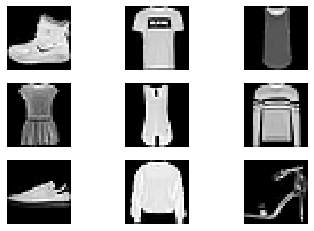

In [91]:
plt.figure()
for k in range(9):
    plt.subplot(3,3,k+1)
    plt.imshow(X_train_full[k], cmap="gray")
    plt.axis('off')
plt.show()

In [92]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

In [93]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.00001))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    my_dense_layer(500),
    my_dense_layer(100),
    my_dense_layer(10, activation="softmax")
])

In [94]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [95]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 35s 633us/sample - loss: 0.4898 - accuracy: 0.8274 - val_loss: 0.3698 - val_accuracy: 0.8708
Epoch 2/5
55000/55000 [==============================] - 33s 606us/sample - loss: 0.3786 - accuracy: 0.8655 - val_loss: 0.3659 - val_accuracy: 0.8726
Epoch 3/5
55000/55000 [==============================] - 34s 626us/sample - loss: 0.3431 - accuracy: 0.8787 - val_loss: 0.3274 - val_accuracy: 0.8880
Epoch 4/5
55000/55000 [==============================] - 35s 627us/sample - loss: 0.3250 - accuracy: 0.8848 - val_loss: 0.3467 - val_accuracy: 0.8794
Epoch 5/5
55000/55000 [==============================] - 34s 615us/sample - loss: 0.3058 - accuracy: 0.8934 - val_loss: 0.3103 - val_accuracy: 0.8952


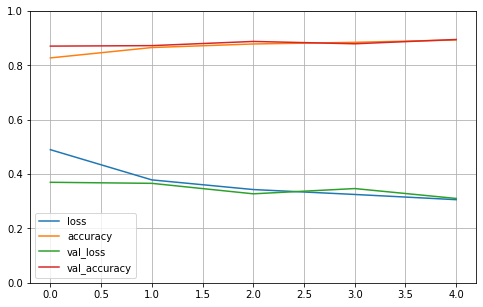

In [96]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [97]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[4480    3   69   61   14    1  883    0   32    0]
 [   4 5358    4   58    8    0   11    0    1    0]
 [  28    0 4329   44  591    0  495    0    9    0]
 [ 149   16   18 4934  213    0  155    0   14    0]
 [   2    2  333  127 4707    0  327    0   14    0]
 [   0    0    0    0    0 5424    0   58    3   22]
 [ 375    2  252   75  338    0 4439    0   26    0]
 [   0    0    0    0    0   60    0 5355    3   70]
 [   0    2    6    8   23    5   33    2 5431    0]
 [   0    0    0    0    0   22    0  224    5 5243]]


In [98]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.35681622195243834, 0.8796]

In [99]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[772   1  16  14   6   1 178   0  12   0]
 [  2 970   0  18   4   0   5   0   1   0]
 [ 11   0 752  13 123   0 101   0   0   0]
 [ 22   5  10 875  39   0  44   0   5   0]
 [  1   0  76  28 822   0  72   0   1   0]
 [  0   0   0   1   0 965   0  22   0  12]
 [ 76   0  70  25  70   0 750   0   9   0]
 [  0   0   0   0   0  19   0 969   0  12]
 [  3   0   2   3   4   3   3   3 979   0]
 [  0   0   0   0   0   4   1  53   0 942]]
